In [1]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df1 = pd.read_excel(r"C:\Users\User\Desktop\tabelas_retencao_fonte1.xlsx", sheet_name = '1', skiprows=3)
df2 = pd.read_excel(r"C:\Users\User\Desktop\tabelas_retencao_fonte1.xlsx", sheet_name = '2', skiprows=3)
df3 = pd.read_excel(r"C:\Users\User\Desktop\tabelas_retencao_fonte1.xlsx", sheet_name = '3', skiprows=3)
df4 = pd.read_excel(r"C:\Users\User\Desktop\tabelas_retencao_fonte1.xlsx", sheet_name = '4', skiprows=3)
df5 = pd.read_excel(r"C:\Users\User\Desktop\tabelas_retencao_fonte1.xlsx", sheet_name = '5', skiprows=3)
df6 = pd.read_excel(r"C:\Users\User\Desktop\tabelas_retencao_fonte1.xlsx", sheet_name = '6', skiprows=3)
df7 = pd.read_excel(r"C:\Users\User\Desktop\tabelas_retencao_fonte1.xlsx", sheet_name = '7', skiprows=3)

In [3]:
df1

,Unnamed: 0,Unnamed: 1,Remuneração mensal (€),Taxa marginal máxima,Parcela a abater (€),Parcela adicional a abater por dependente (€)
0,NaN,NaN,820,0.0000,0,0.00
1,NaN,NaN,935,0.1325,(0.1325*2.6)*(1135.39-R),21.43
2,NaN,NaN,1001,0.1800,(0.18*1.4)*(1385.20-R),21.43
3,NaN,NaN,1123,0.1800,96.82,21.43
4,NaN,NaN,1765,0.2600,186.66,21.43
5,NaN,NaN,2057,0.3275,305.8,21.43
6,NaN,NaN,2664,0.3700,393.23,21.43
7,NaN,NaN,3193,0.3872,439.05,21.43
8,NaN,NaN,4173,0.4005,481.52,21.43
9,NaN,NaN,5470,0.4100,521.17,21.43


In [4]:
dfs_list = [df1, df2, df3, df4, df5, df6, df7]

for i in dfs_list:
    i.drop(i.columns[[0,1]], axis=1, inplace=True)

In [5]:
df1

,Remuneração mensal (€),Taxa marginal máxima,Parcela a abater (€),Parcela adicional a abater por dependente (€)
0,820,0.0000,0,0.00
1,935,0.1325,(0.1325*2.6)*(1135.39-R),21.43
2,1001,0.1800,(0.18*1.4)*(1385.20-R),21.43
3,1123,0.1800,96.82,21.43
4,1765,0.2600,186.66,21.43
5,2057,0.3275,305.8,21.43
6,2664,0.3700,393.23,21.43
7,3193,0.3872,439.05,21.43
8,4173,0.4005,481.52,21.43
9,5470,0.4100,521.17,21.43


In [6]:
print("Escolha a opção que indica o seu estado civil:")
print("1 - Não casado sem dependentes ou casado dois titulares")
print("2 - Não casado com um ou mais dependentes")
print("3 - Casado único titular")
print("4 - Não casado ou casado dois titulares sem dependentes - Deficiente")
print("5 - Não casado, com um ou mais dependentes - Deficiente")
print("6 - Casado dois titulares, com um ou mais dependentes - Deficiente")
print("7 - Casado único titular - Deficiente")

while True:
    try:
        estado_civil = int(input("Insira o número da opção desejada: "))
        if 1 <= estado_civil <= 7:
            break
        else:
            print("Por favor, escolha um número válido.")
    except ValueError:
        print("Por favor, escolha um número válido.")

Escolha a opção que indica o seu estado civil:
1 - Não casado sem dependentes ou casado dois titulares
2 - Não casado com um ou mais dependentes
3 - Casado único titular
4 - Não casado ou casado dois titulares sem dependentes - Deficiente
5 - Não casado, com um ou mais dependentes - Deficiente
6 - Casado dois titulares, com um ou mais dependentes - Deficiente
7 - Casado único titular - Deficiente
Insira o número da opção desejada: 1


In [7]:
estcivil_dependentes = [2,3,5,6,7]

if estado_civil in estcivil_dependentes:
    while True:
        try:
            num_dependentes = int(input("Insira o número de dependentes: "))
            if num_dependentes >= 0:
                break
            else:
                print("Por favor, escolha um número válido.")
        except ValueError:
            print("Por favor, escolha um número válido.")
else:
    num_dependentes = 0

In [8]:
remuneracao_bruta = float(input("Digite o valor da remuneração bruta em €: "))

Digite o valor da remuneração bruta em €: 1000


In [9]:
dataframes = {1: df1, 2:df2, 3:df3, 4:df4, 5:df5, 6:df6, 7:df7}

In [10]:
df_user = dataframes.get(estado_civil)
df_user

,Remuneração mensal (€),Taxa marginal máxima,Parcela a abater (€),Parcela adicional a abater por dependente (€)
0,820,0.0000,0,0.00
1,935,0.1325,(0.1325*2.6)*(1135.39-R),21.43
2,1001,0.1800,(0.18*1.4)*(1385.20-R),21.43
3,1123,0.1800,96.82,21.43
4,1765,0.2600,186.66,21.43
5,2057,0.3275,305.8,21.43
6,2664,0.3700,393.23,21.43
7,3193,0.3872,439.05,21.43
8,4173,0.4005,481.52,21.43
9,5470,0.4100,521.17,21.43


In [11]:
linha_parcela = df_user[df_user['Remuneração mensal (€)'] >= remuneracao_bruta].iloc[0] 
linha_parcela

Remuneração mensal (€)                                             1001
Taxa marginal máxima                                               0.18
Parcela a abater (€)                             (0.18*1.4)*(1385.20-R)
Parcela adicional a abater por dependente (€)                     21.43
Name: 2, dtype: object

In [12]:
if 'R' in linha_parcela['Parcela a abater (€)']:
    linha_parcela['Parcela a abater (€)'] = linha_parcela['Parcela a abater (€)'].replace('R', str(remuneracao_bruta))
    deducao = eval(linha_parcela['Parcela a abater (€)'])
else:
    deducao = linha_parcela['Parcela a abater (€)']

In [13]:
parcela_abate = math.floor((remuneracao_bruta*linha_parcela['Taxa marginal máxima'])-deducao-(num_dependentes * linha_parcela['Parcela adicional a abater por dependente (€)']))

In [14]:
print("Tem subsídio de refeição:")
print("1 - Não tenho")
print("2 - Sim, tenho cartão refeição")
print("3 - Sim, em remuneração")

while True:
    try:
        opc_refeicao = int(input("Insira o número da opção desejada: "))
        if 1 <= opc_refeicao <= 3:
            break
        else:
            print("Por favor, escolha um número válido.")
    except ValueError:
        print("Por favor, escolha um número válido.")

Tem subsídio de refeição:
1 - Não tenho
2 - Sim, tenho cartão refeição
3 - Sim, em remuneração
Insira o número da opção desejada: 2


In [15]:
if opc_refeicao == 2 or opc_refeicao == 3:
    print("É necessário indicar o valor diário e o número de dias")
else:
    valor_refeicao = 0
    num_dias = 0
    
while True:
    try:
        valor_refeicao = float(input("Indique o valor diário:"))
        num_dias = int(input("Indique o número de dias:"))
        if valor_refeicao >= 0 and num_dias >= 0:
            break
        else:
            print("Por favor, escolha um número válido.")
    except ValueError:
        print("Por favor, escolha um número válido.")

É necessário indicar o valor diário e o número de dias
Indique o valor diário:9.6
Indique o número de dias:22


In [16]:
if opc_refeicao == 1:
    remuneracao_liquida = math.floor((remuneracao_bruta * 0.89) - parcela_abate)
elif opc_refeicao == 2:
    subs_refeicao = num_dias * valor_refeicao
    remuneracao_liquida = math.floor((remuneracao_bruta * 0.89) - parcela_abate) + subs_refeicao
else:
    subs_refeicao = num_dias * valor_refeicao
    remuneracao_liquida = math.floor((remuneracao_bruta * 0.89) - parcela_abate) + subs_refeicao

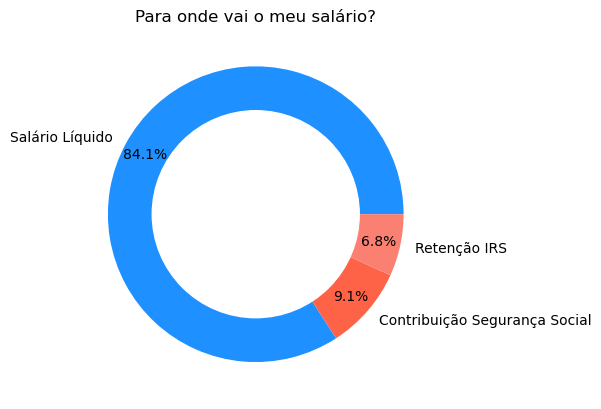

O seu salário líquido é de 1019.2€ por mês.


In [17]:
seg_social = remuneracao_bruta * 0.11
irs = parcela_abate
salario = np.array([remuneracao_liquida, seg_social, irs])
names = ['Salário Líquido', 'Contribuição Segurança Social', 'Retenção IRS']

circle = plt.Circle( (0,0), 0.7, color='white' )

plt.pie(salario, labels=names, colors=['dodgerblue','tomato','salmon'], autopct='%1.1f%%', pctdistance=0.85)
pie = plt.gcf()
pie.gca().add_artist(circle)
plt.title('Para onde vai o meu salário?')
plt.show()

print(f"O seu salário líquido é de {remuneracao_liquida}€ por mês.")